Data Cleaning

In [1]:
# read the data and name the columns

import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)

In [2]:
# index
df = df.set_index("LIT Leave Decision Date - Year")
df = df.sort_index()

In [3]:
# drop additional columns
df = df.iloc[:-7]

In [4]:
df.tail(10)

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
LIT Leave Decision Date - Year,,,,,,,,,
2023,Mexico,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,2.0
2023,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Lack Jurisdictio,Person Concerned,Federal Court,Port of Entry,Fort Erie District,1.0
2023,Libya,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Regional HQ Prairies NT,1.0
2023,India,Dismissed at Leave,Removal Order,Minister-Removal Order / Admin,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,2.0
2023,Namibia,Dismissed at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,India,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,5.0
2023,Senegal,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,Uganda,Discontinued - Consent at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,1.0
2023,Nigeria,Discontinued - Consent at Leave,Removal Arrangements,A48-Removal Arrang.-Refusal,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,1.0


In [5]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

EDA

Getting a general idea of the data

In [6]:
# total number of cases in the dataset
df['LIT Litigation Count'].sum()

np.int64(48308)

In [7]:
# sum of LIT Litigation Count per year
top_year = df.groupby('LIT Leave Decision Date - Year')['LIT Litigation Count'].sum()
top_year

LIT Leave Decision Date - Year
2018    6621
2019    8277
2020    5249
2021    9625
2022    9473
2023    9063
Name: LIT Litigation Count, dtype: int64

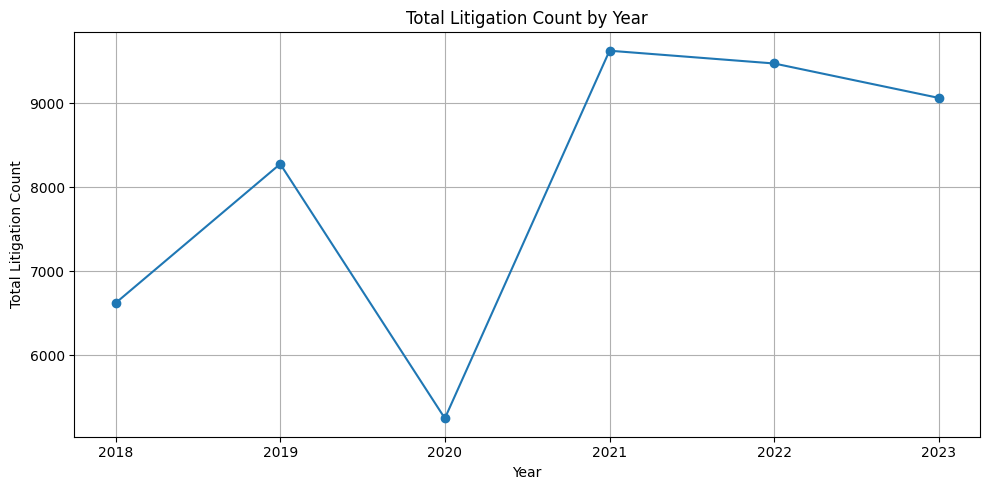

In [8]:
# making a line chart to see trend
import matplotlib.pyplot as plt

top_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Total Litigation Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Litigation Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Question to explore: what happened in 2020? COVID?

In [9]:
# total litigation volume per country
top_volume = df.groupby('Country of Citizenship')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_volume

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
                              ... 
Iceland                          1
Bhutan                           1
Vanuatu                          1
Macao SAR                        1
Solomons, The                    1
Name: LIT Litigation Count, Length: 180, dtype: int64

In [10]:
# trying to understand what types of decisions are made
top_decs = df.groupby('LIT Leave Decision Desc')['LIT Litigation Count'].sum().sort_values(ascending=False)
top_decs

LIT Leave Decision Desc
Dismissed at Leave                   24843
Allowed                               9000
Discontinued - Withdrawn at Leave     8007
Discontinued - Consent at Leave       5923
Allowed - Consent                      486
Not Started at Leave                    38
No Leave Required                        9
Leave Exception                          2
Name: LIT Litigation Count, dtype: int64

In [11]:
# creating a subset of the data for the top 10 countries
top_volume.head(10)

Country of Citizenship
Nigeria                       7819
India                         6825
Iran                          4503
People's Republic of China    3223
Pakistan                      2151
Mexico                        2004
Haiti                         1658
Colombia                      1479
United States of America       901
Philippines                    660
Name: LIT Litigation Count, dtype: int64

In [12]:
top_10_countries = [
    'Nigeria', 'India', 'Iran', "People's Republic of China", 'Pakistan',
    'Mexico', 'Haiti', 'Colombia', 'United States of America', 'Philippines'
]

top_10 = df[df['Country of Citizenship'].isin(top_10_countries)]

To have a closer look into COVID 

In [13]:
top_10 = top_10.copy()

In [14]:
def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

In [15]:
top_10

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count,Period
LIT Leave Decision Date - Year,,,,,,,,,,
2018,People's Republic of China,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Unspecified,1,Pre-COVID
2018,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,5,Pre-COVID
2018,India,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Third Party,Federal Court,International Network,Unspecified,7,Pre-COVID
2018,Colombia,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Ontario West Area,1,Pre-COVID
2018,Colombia,Allowed,RPD Decisions,RPD-Not CR/Protected Person,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,2,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...
2023,Mexico,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,2,Post-COVID
2023,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Lack Jurisdictio,Person Concerned,Federal Court,Port of Entry,Fort Erie District,1,Post-COVID
2023,India,Dismissed at Leave,Removal Order,Minister-Removal Order / Admin,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,2,Post-COVID


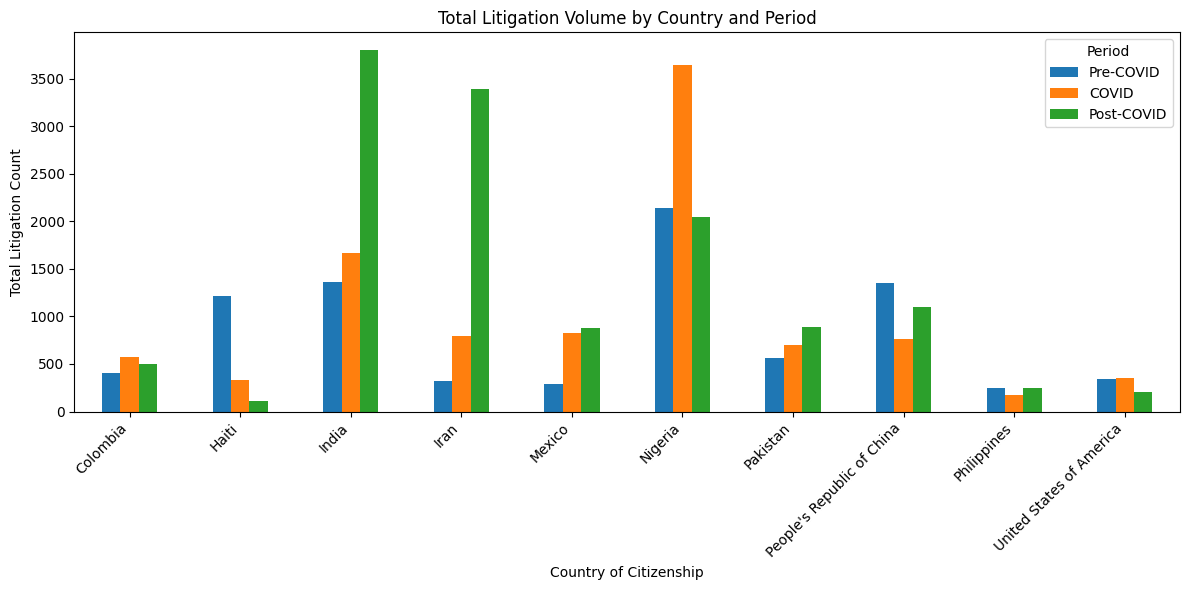

In [28]:
import matplotlib.pyplot as plt

grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.savefig("../img/litigation_volume_by_country_and_period.png", dpi=300)
plt.show()

Insights: different patterns accross the countries 

India & Iran: surged post covid

Nigeria: spiked during covid and reduced after

China: declined during covid and bounced back after

In [17]:
# group by country and period, sum litigation count
grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce order
)

# normalize so each country's total = 1
grouped_norm = grouped.div(grouped.sum(axis=1), axis=0)

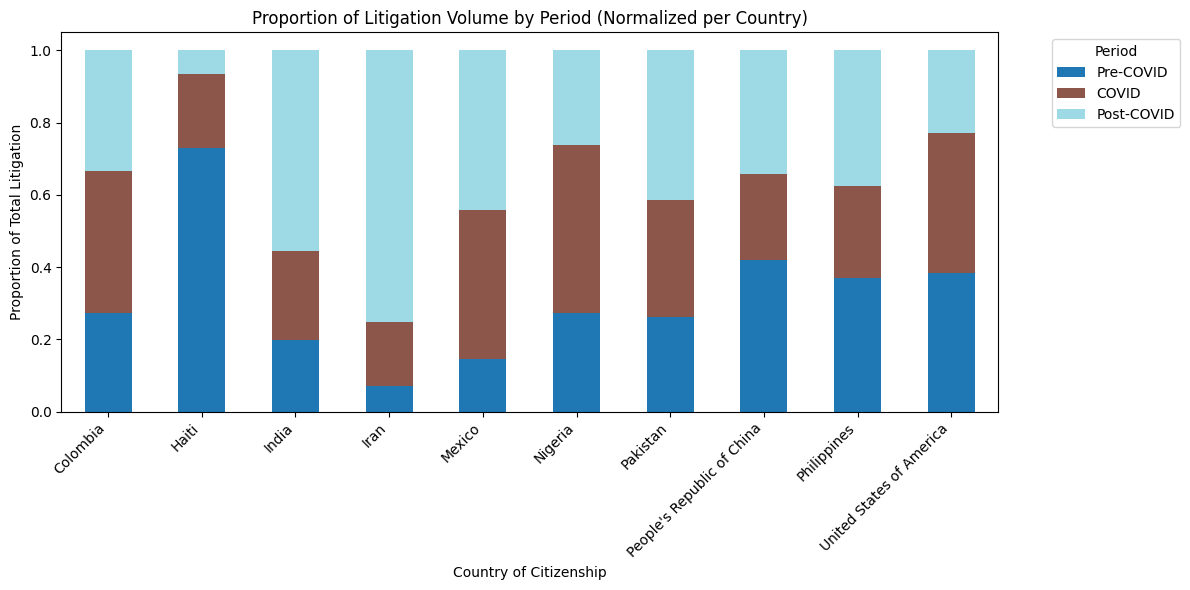

In [18]:
# plot normalized as stacked bar chart
grouped_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Proportion of Litigation Volume by Period (Normalized per Country)')
plt.xlabel('Country of Citizenship')
plt.ylabel('Proportion of Total Litigation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# for presentation only
countries_4 = [
    'Nigeria', 'India', 'Iran', "People's Republic of China"
]

top_4 = df[df['Country of Citizenship'].isin(countries_4)]
top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")

/var/folders/jm/vq4rdv3n6m98v4n_yykz5l6r0000gn/T/ipykernel_80839/3067666433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4['Country of Citizenship'] = top_4['Country of Citizenship'].replace("People's Republic of China", "China")


In [20]:
top_4 = top_4.copy()

def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021]:
        return 'COVID'
    elif year in [2022,  2023]:
        return 'Post-COVID'
    else:
        return 'Other'

top_4['Period'] = top_4.index.to_series().astype(int).apply(classify_period)

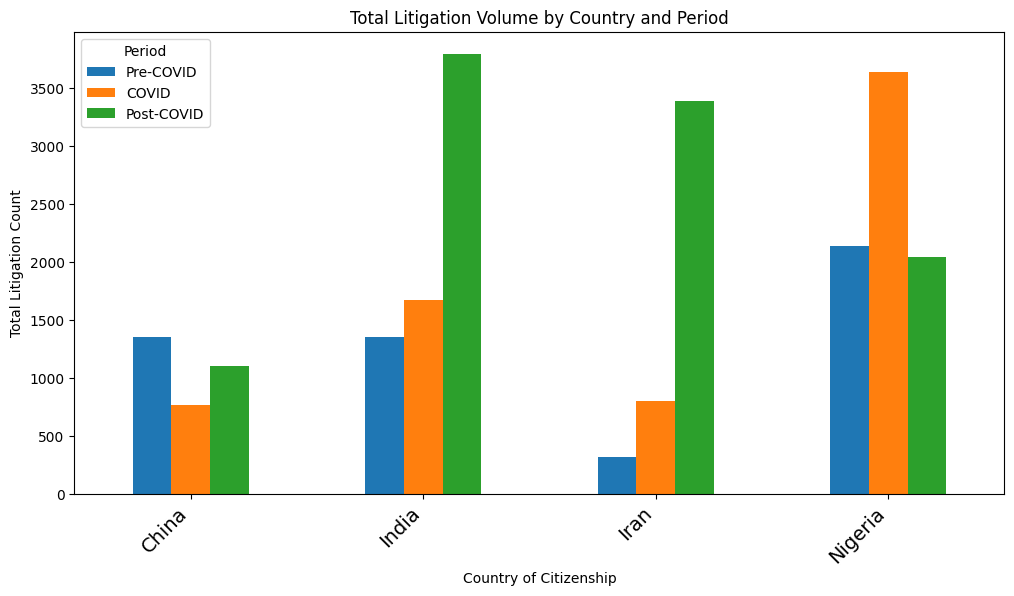

In [21]:
import matplotlib.pyplot as plt

grouped = (
    top_4.groupby(['Country of Citizenship', 'Period'])['LIT Litigation Count']
    .sum()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Total Litigation Volume by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Total Litigation Count')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend(title='Period')
plt.show()

Next steps: Compare countries, i.e. India & Nigeria

Breakdown Leave Decision

In [22]:
top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum()

Country of Citizenship    Period      LIT Leave Decision Desc          
Colombia                  COVID       Allowed                              143
                                      Allowed - Consent                      1
                                      Discontinued - Consent at Leave       14
                                      Discontinued - Withdrawn at Leave    129
                                      Dismissed at Leave                   290
                                                                          ... 
United States of America  Post-COVID  Dismissed at Leave                   109
                          Pre-COVID   Allowed                               48
                                      Discontinued - Consent at Leave       10
                                      Discontinued - Withdrawn at Leave     29
                                      Dismissed at Leave                   259
Name: LIT Litigation Count, Length: 164, dtype: int64

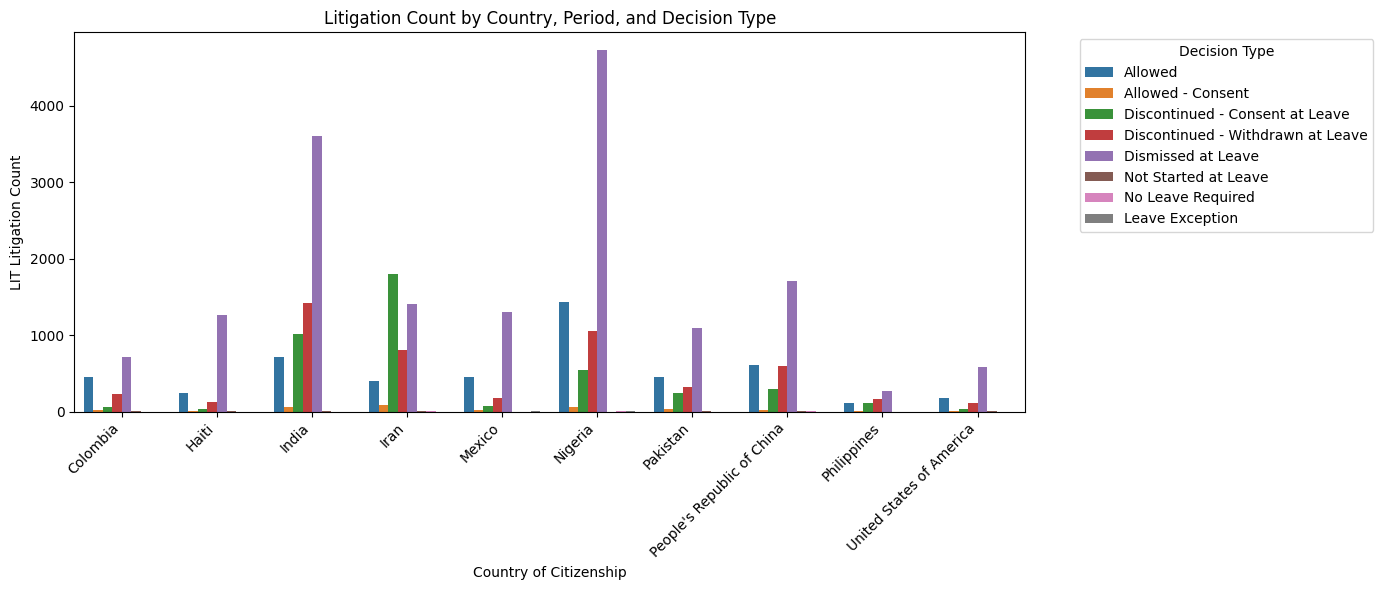

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_10.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# focusing on top 5 decisions

top_5_decisions = (
    top_10['LIT Leave Decision Desc']
    .value_counts()
    .head(5)
    .index.tolist()
)

top_decs = top_10[top_10['LIT Leave Decision Desc'].isin(top_5_decisions)]

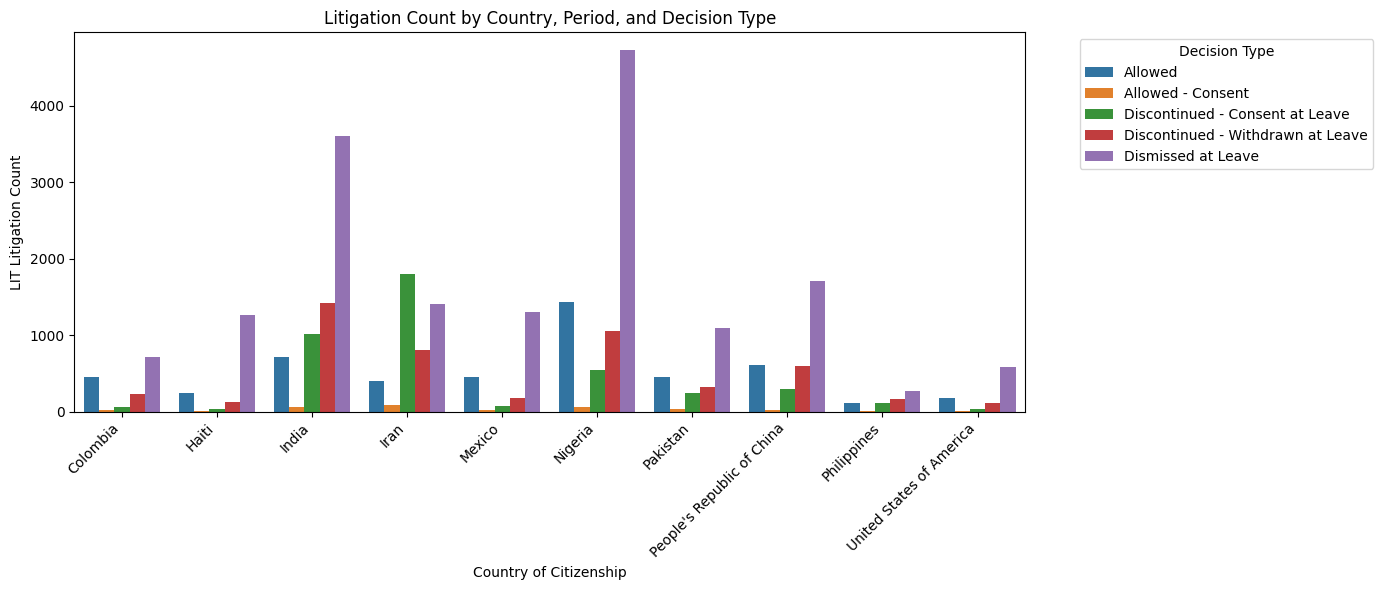

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset index to make columns
decision_breakdown = top_decs.groupby(['Country of Citizenship', 'Period', 'LIT Leave Decision Desc'])['LIT Litigation Count'].sum().reset_index()

# plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=decision_breakdown,
    x='Country of Citizenship',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Litigation Count by Country, Period, and Decision Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decision Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Zooming in to look at India

In [26]:
india_only = top_decs[top_decs['Country of Citizenship'] == 'India']

In [27]:
# set categorical order for Period
period_order = ['Pre-COVID', 'COVID', 'Post-COVID']
india_grouped['Period'] = pd.Categorical(india_grouped['Period'], categories=period_order, ordered=True)

# plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=india_grouped,
    x='Period',
    y='LIT Litigation Count',
    hue='LIT Leave Decision Desc',
    estimator=sum,
    errorbar=None
)
plt.title('Top 5 Leave Decisions in India by Period')
plt.xlabel('Period')
plt.ylabel('Total Litigation Count')
plt.legend(title='Decision Type')
plt.tight_layout()
plt.show()

NameError: name 'india_grouped' is not defined